Let's see if we detected anything this time?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [3]:
path = '/media/david/5tb_storage1/muscles/ltt1445/hst/redo_data/'

In [4]:
x1ds = glob.glob(path+'*x1d.fits')
print(x1ds)
sx1s = glob.glob(path+'sx1.fits')
print(sx1s)

['/media/david/5tb_storage1/muscles/ltt1445/hst/redo_data/oe83h3020_x1d.fits', '/media/david/5tb_storage1/muscles/ltt1445/hst/redo_data/oe83h3030_x1d.fits']
[]


No sx1 - no sign of any flux in the ccd raw images. Huh? There should at least be something at longer wavelengths?

G230L


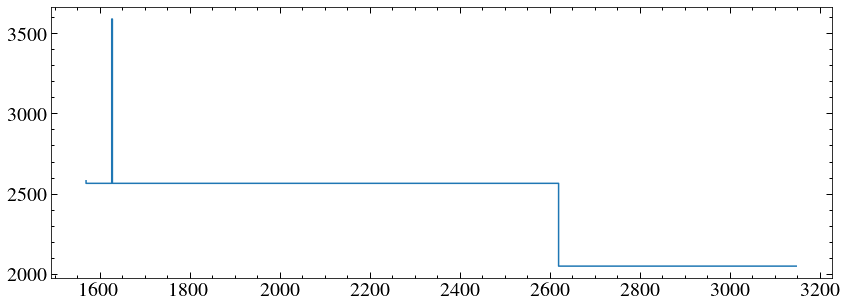

G140M


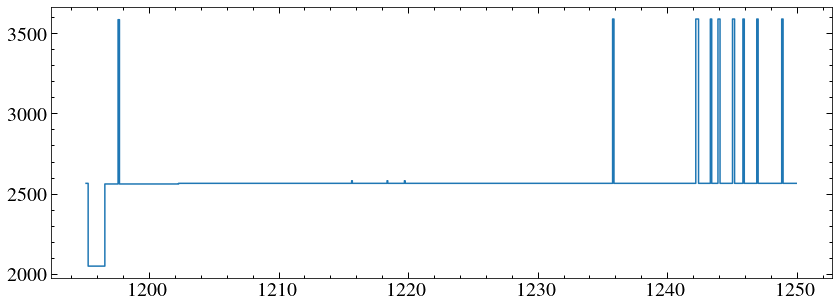

In [5]:
for x in x1ds:
    hdul = fits.open(x)
    print(hdul[0].header['OPT_ELEM'])
    data = hdul[1].data[0]
    hdul.close()
    #plt.step(data['WAVELENGTH'][data['DQ']==0], data['FLUX'][data['DQ']==0])
    plt.step(data['WAVELENGTH'], data['DQ'])
    plt.show()
    

In [6]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                38946 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   19 / number of fields in each row                   
TTYPE1  = 'SPORDER '           / label for field   1                            
TFORM1  = '1I      '           / data format of field: 2-byte INTEGER           
TTYPE2  = 'NELEM   '           / label for field   2                            
TFORM2  = '1I      '           / data format of field: 2-byte INTEGER           
TTYPE3  = 'WAVELENGTH'      

DQ filters out everything! No Mg ii lines- check raw data...

Mucking around with the Swift data to do a gif...

In [7]:
spath = '/media/david/5tb_storage1/muscles/ltt1445/swift/'
sobs = glob.glob(spath+'00*')
sobs

['/media/david/5tb_storage1/muscles/ltt1445/swift/00012837002',
 '/media/david/5tb_storage1/muscles/ltt1445/swift/00012837003']

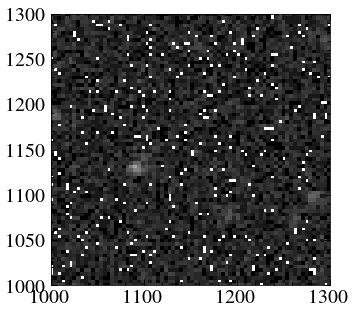

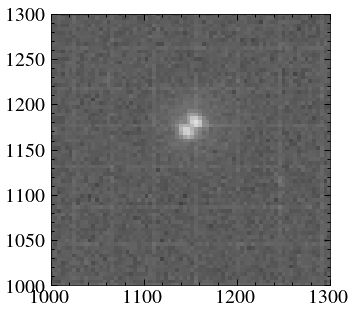

In [8]:
from matplotlib.colors import LogNorm
from pylab import cm  
for sob in sobs:
    dpath = glob.glob('{}/uvot/event/clean*'.format(sob))[0]
    data = fits.getdata(dpath, 1)
    plt.figure(figsize=(5, 5))
    
    NBINS = (500,500)
    img_zero_mpl = plt.hist2d(data['RAWX'], data['RAWY'], NBINS, cmap='gray', norm=LogNorm())
    lims = [1000, 1300]
    plt.xlim(lims)
    plt.ylim(lims)

    #cbar = plt.colorbar(ticks=[1.0,3.0,6.0])
 #   cbar.ax.set_yticklabels(['1','3','6'])

   # plt.xlabel('x')
   #plt.ylabel('y')

   # plt.hist2d(data['RAWX'], data['RAWY'], bins=100)
    plt.show()
                      

In [9]:
from astropy.time import Time
from astropy.coordinates import SkyCoord, Distance

c = SkyCoord(ra='03h01m51.39s', dec='-16d35m36.1s', distance = Distance(parallax=0.1455e3*u.mas), frame='icrs', pm_ra_cosdec = -369.2*u.mas/u.yr, pm_dec= -268.3*u.mas/u.yr, obstime=Time(2015.05, format='decimalyear'))
c

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (45.464125, -16.59336111, 6.87285223)
 (pm_ra_cosdec, pm_dec) in mas / yr
    (-369.2, -268.3)>

In [10]:
c2 = c.apply_space_motion(new_obstime=Time('2020-06-17 10:13:11'))

In [11]:
c2.ra.hms

hms_tuple(h=3.0, m=1.0, s=51.25104314095822)

In [12]:
c2.dec.dms

dms_tuple(d=-16.0, m=-35.0, s=-37.55162745037239)

In [13]:
1/0.1455

6.872852233676976

In [89]:
c3 = SkyCoord(ra=45.46247805566359*u.degree, dec=-16.594495614724412*u.degree, distance = Distance(parallax=0.1455e3*u.mas), frame='icrs', pm_ra_cosdec = -369.2*u.mas/u.yr, pm_dec= -268.3*u.mas/u.yr, obstime=Time(2015.05, format='decimalyear'))


In [90]:
c4 = c3.apply_space_motion(new_obstime=Time('2020-06-17 10:13:11'))

In [91]:
c4.ra.hms

hms_tuple(h=3.0, m=1.0, s=50.85577568027123)

In [92]:
c4.dec.dms

dms_tuple(d=-16.0, m=-35.0, s=-41.635840458050666)

In [20]:
c3.ra.hms

hms_tuple(h=3.0, m=1.0, s=50.99473335926344)

In [21]:
c3.dec.dms

dms_tuple(d=-16.0, m=-35.0, s=-40.18421300788333)

In [22]:
c5 = c.apply_space_motion(new_obstime=Time('2003-06-18 23:52:38'))

In [23]:
print(c5.ra.hms, c5.dec.hms)

hms_tuple(h=3.0, m=1.0, s=51.687593460322354) hms_tuple(h=-1.0, m=-6.0, s=-22.199407915083178)


In [24]:
hdul = fits.open(path +'oe83h3010_flt.fits')

In [26]:
#hdul[1].header

(0.0, 30.0)

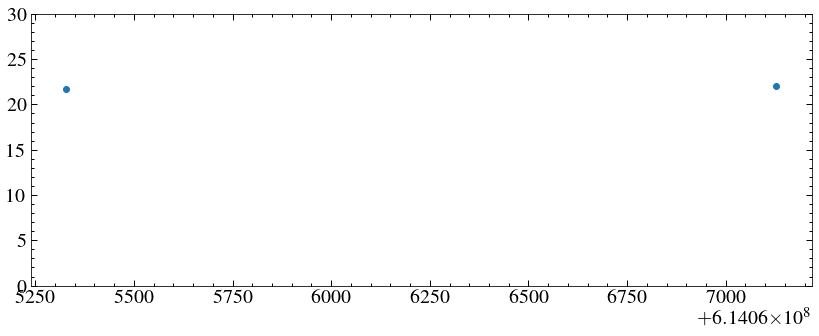

In [84]:
lc100 = fits.getdata('/media/david/5tb_storage1/muscles/ltt1445/swift/00012837002/uvot/event/ltt1445A_1800slc_002.fits', 1)
#plt.errorbar(lc100['TIME'][2:], lc100['AB_MAG'][2:], lc100['AB_MAG_ERR'][2:], ls='none', marker='o')
mask = ((lc100['AB_MAG']/lc100['AB_MAG_ERR']) > 10)
lc100 = lc100[mask]
plt.errorbar(lc100['TIME'], lc100['AB_MAG'], lc100['AB_MAG_ERR'], ls='none', marker='o')
plt.ylim(0, 30)

In [85]:
len(lc100['AB_MAG'])

2

In [86]:
print (lc100['AB_MAG'], lc100['AB_MAG_ERR'])

[21.718546 21.97518 ] [0.30189753 0.29758927]


In [87]:
mf = np.median(lc100['AB_MAG'])
me = mf*np.sum((lc100['AB_MAG_ERR']/lc100['AB_MAG'])**2)**0.5
print(mf, me)

21.846863 0.4239698632079435


In [88]:
mf = np.median(lc100['AB_FLUX_AA'])
me = mf*np.sum((lc100['AB_FLUX_AA_ERR']/lc100['AB_FLUX_AA'])**2)**0.5
print(mf, me)

4.065717e-17 1.5874082755064126e-17


In [80]:
mf = np.mean(lc100['MAG'])
me = mf*np.sum((lc100['MAG_ERR']/lc100['MAG'])**2)**0.5
print(mf, me)
mf = np.mean(lc100['FLUX_AA'])
me = mf*np.sum((lc100['FLUX_AA_ERR']/lc100['FLUX_AA'])**2)**0.5
print(mf, me)

18.77056 10.059908172368894
1.6681362e-16 1.5709698123913468e-15


In [42]:
lc100.names

['MET',
 'EXTNAME',
 'TSTART',
 'TSTOP',
 'EXPOSURE',
 'TELAPSE',
 'TIME',
 'SRC_AREA',
 'BKG_AREA',
 'STD_AREA',
 'PLATE_SCALE',
 'RAW_TOT_CNTS',
 'RAW_TOT_CNTS_ERR',
 'RAW_BKG_CNTS',
 'RAW_BKG_CNTS_ERR',
 'RAW_STD_CNTS',
 'RAW_STD_CNTS_ERR',
 'RAW_TOT_RATE',
 'RAW_TOT_RATE_ERR',
 'RAW_BKG_RATE',
 'RAW_BKG_RATE_ERR',
 'RAW_STD_RATE',
 'RAW_STD_RATE_ERR',
 'COI_STD_FACTOR',
 'COI_STD_FACTOR_ERR',
 'COI_BKG_FACTOR',
 'COI_BKG_FACTOR_ERR',
 'COI_TOT_RATE',
 'COI_TOT_RATE_ERR',
 'COI_BKG_RATE',
 'COI_BKG_RATE_ERR',
 'COI_SRC_RATE',
 'COI_SRC_RATE_ERR',
 'AP_FACTOR',
 'AP_FACTOR_ERR',
 'AP_COI_SRC_RATE',
 'AP_COI_SRC_RATE_ERR',
 'LSS_FACTOR',
 'LSS_RATE',
 'LSS_RATE_ERR',
 'SENSCORR_FACTOR',
 'SENSCORR_RATE',
 'SENSCORR_RATE_ERR',
 'CORR_RATE',
 'CORR_RATE_ERR',
 'AB_MAG',
 'AB_MAG_ERR',
 'AB_MAG_ERR_STAT',
 'AB_MAG_ERR_SYS',
 'AB_MAG_BKG',
 'AB_MAG_BKG_ERR_STAT',
 'AB_MAG_BKG_ERR_SYS',
 'AB_MAG_BKG_ERR',
 'AB_MAG_LIM',
 'AB_MAG_LIM_SIG',
 'AB_MAG_COI_LIM',
 'AB_FLUX_AA',
 'AB_FLUX_AA_ERR_

In [50]:
(614067120.916038-614048228.21956)/60

314.8782746334871